<a href="https://colab.research.google.com/github/DeeS17/data_preprocessing/blob/main/sprint_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Menganalisis Risiko Gagal Bayar Peminjam

Pada proyek ini saya akan menyiapkan laporan untuk divisi kredit suatu bank. Saya akan mencari tahu pengaruh status perkawinan seorang nasabah dan jumlah anak yang dimilikinya terhadap probabilitas gagal bayar dalam pelunasan pinjaman. Pihak bank sudah memiliki beberapa data mengenai kelayakan kredit nasabah.

Tujuan dan hipotesis yang diuji dari proyek ini adalah untuk mencari tahu apakah ada pengaruh status perkawinan dan jumlah anak memiliki pengaruh terhadap gagal bayar dalam pelunasan pinjaman.

## Mengimpor Library dan Memuat Data

In [ ]:
# Muat semua *library*
import pandas as pd
import seaborn as sns

In [ ]:
# Muat datanya
try:
  df = pd.read_csv('/content/credit_scoring_eng.csv')
except:
  df = pd.read_csv('/datasets/credit_scoring_eng.csv')

df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


**Deskripsi Data**
- `children` - jumlah anak dalam keluarga
- `days_employed` - pengalaman kerja nasabah dalam hari
- `dob_years` - usia nasabah dalam tahun
- `education` - tingkat pendidikan nasabah
- `education_id` - pengidentifikasi untuk tingkat pendidikan nasabah
- `family_status` - pengidentifikasi untuk status perkawinan nasabah
- `family_status_id` - tanda pengenal status perkawinan
- `gender` - jenis kelamin nasabah
- `income_type` - jenis pekerjaan
- `debt` - apakah nasabah memiliki hutang pembayaran pinjaman
- `total_income` - pendapatan bulanan
- `purpose` - tujuan mendapatkan pinjaman


In [ ]:
# Mari kita lihat berapa banyak baris dan kolom yang dimiliki oleh dataset kita
df.shape

(21525, 12)

In [ ]:
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


- Pada kolom days_employed baris pertama nilai nya negatif. Padahal harusnya lama hari dalam pekerjaan tidak bisa negatif. 
- Pada kolom days_employed juga nilainya float, padahal harusnya hari bekerja satuan ukurnya tanpa desimal.
- Pada kolom education penulisannya tidak seragam, kadang menggunakan kapital semua, kadang huruf kecil semua.

In [ ]:
# Dapatkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [ ]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


- ada nilai yang hilang dan jumlahnya sama pada kolom days_employed & total_income.
- nilai pada kolom children nilai minimunya tidak masuk akal. karena -1.
- pada kolom days_employed juga mengalami nilai negatif, padahal tidak mungkin lama seorang bekerja negatif. 

In [ ]:
# Mari kita lihat tabel yang difilter dengan nilai yang hilang di kolom pertama yang mengandung data yang hilang
df.loc[df['days_employed'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


Pada data yg hilang pada kolom pertama (days_employed) mengalami kehilangan data juga pada kolom kedua (total_income).

In [ ]:
# Mari kita terapkan beberapa kondisi untuk memfilter data dan melihat jumlah baris dalam tabel yang telah difilter.
df_na = df.loc[(df['days_employed'].isna()) & (df['total_income'].isna()), ['days_employed', 'total_income']]
df_na.shape

(2174, 2)

Setelah difilter isna() kolom `days_employed` & `total_income` hasilnya sebesar `2,174`. Dan nasabah mengalami data yang hilang pada kolom `days_employed` juga mengalami kehilangan data pada `total_income`. Artinya ada `2,174` nasabah yang mengalami kehilangan data pada 2 kolom sekaligus, yaitu `days_employed` dan `total_income`. 

In [ ]:
rows_in_df_na = df_na.shape[0]
rows_in_df = df.shape[0]

round(rows_in_df_na / rows_in_df * 100, )

10

Setelah diperiksa jumlah data yg hilang 2174 dari 21525. Jumlah tersebut cukup besar, karena persentasenya sekitar 10%. Karena persentasenya cukup besar, maka kelompok data yang memiliki nilai yang hilang akan coba dipertahankan jika masih bisa. Cara mempertahankannya dengan mengisi nilai yg hilang dengan nilai mean atau median pada kolom yang hilang.

In [ ]:
# Mari kita periksa nasabah yang tidak memiliki data tentang karakteristik yang teridentifikasi dan kolom dengan nilai yang hilang
other_columns = ['children', 'dob_years', 'education', 'education_id', 'family_status', 'family_status_id', 'gender', 'income_type', 'debt', 'purpose']
data_na = df.loc[(df['days_employed'].isna()) & (df['total_income'].isna())]


print('karakterisik children pada kelompok nasabah dengan nilai yang hilang:')
data_na['children'].sort_values().unique()

karakterisik children pada kelompok nasabah dengan nilai yang hilang:


array([-1,  0,  1,  2,  3,  4,  5, 20])

Pada kolom `children` pada nasabah yang mengalami nilai yang hilang memiliki jumlah anak yang bervariasi. Dari yang tidak memiliki anak hingga yang terbanyak memiliki 5 orang anak. Artinya kelompok nasabah ini mungkin terdiri dari nasabah lajang hingga sudah berkeluarga.

Selain itu ada hal yang janggal, karena ada nasabah yang memiliki anak `-1` yang mana hal tersebut mustahil. Dan ada juga yang memiliki anak `20`, hal itu mungkin terjadi namun sangat langka terjadi didunia modern sekarang ini. Kedua data itu ada kemungkinan karena ada kesalah saat penginputan.

In [ ]:
#print(df.columns) #test
print('karakterisik dob_years atau usia pada kelompok nasabah dengan nilai yang hilang:')
data_na['dob_years'].sort_values().unique()

karakterisik dob_years atau usia pada kelompok nasabah dengan nilai yang hilang:


array([ 0, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73])

Pada kolom `dob_years` atau usia pada kelompok nasabah yang mengalami nilai yang hilang memiliki rentang yang cukup  panjang mulai dari remaja 19 tahun hingga lansia 73 tahun. Namun ada nilai yang tidak wajar disitu. Karena ada yang bernilai 0. Hal tersebut tidak wajar karena tidak wajar seorang bayi menjadi nasabah bank.

In [ ]:
#print(df.columns) #test
print('karakterisik education pada kelompok nasabah dengan nilai yang hilang:')
data_na['education'].sort_values().unique()

karakterisik education pada kelompok nasabah dengan nilai yang hilang:


array(["BACHELOR'S DEGREE", "Bachelor's Degree", 'PRIMARY EDUCATION',
       'Primary Education', 'SECONDARY EDUCATION', 'SOME COLLEGE',
       'Secondary Education', 'Some College', "bachelor's degree",
       'primary education', 'secondary education', 'some college'],
      dtype=object)

Pada kolom `education` pada kelompok nasabah yang mengalami nilai yang hilang terdiri dari berbagai tingkat pendidikan. Mulai dari yang pendidikan dasar hingga sarjana. Selain itu penulisannya juga kurang seragam. Hal tersebut perlu dirapikan ditahap selanjutnya.

In [ ]:
#print(df.columns) #test
print('karakterisik famiy status pada kelompok nasabah dengan nilai yang hilang:')
data_na['family_status'].sort_values().unique() 

karakterisik famiy status pada kelompok nasabah dengan nilai yang hilang:


array(['civil partnership', 'divorced', 'married', 'unmarried',
       'widow / widower'], dtype=object)

Pada kolom `family_status` atau status perkawinan pada kelompok nasabah yang mengalami nilai yang hilang menunjukan kelompok nasabah ini terdiri dari nasabah dengan berbagai status perkawinan. Dari belum menikah, hingga telah bercerai ada pada kelompok ini.

In [ ]:
#print(df.columns) #test
print('karakterisik gender pada kelompok nasabah dengan nilai yang hilang:')
data_na['gender'].sort_values().unique() 

karakterisik gender pada kelompok nasabah dengan nilai yang hilang:


array(['F', 'M'], dtype=object)

Pada kolom `gender` atau jenis kelamin pada kelompok nasabah yang mengalami nilai yang hilang menunjukan terdiri dari laki-laki dan perempuan.

In [ ]:
#print(df.columns) #test
#print(df['income_type'].sort_values().unique()) #test
print('karakterisik income_type pada kelompok nasabah dengan nilai yang hilang:')
data_na['income_type'].sort_values().unique()

karakterisik income_type pada kelompok nasabah dengan nilai yang hilang:


array(['business', 'civil servant', 'employee', 'entrepreneur', 'retiree'],
      dtype=object)

Pada kolom `income_type` atau jenis pendapatan pada kelompok nasabah yang mengalami nilai yang hilang menunjukan terdiri dari `business`, `civil servant`, `employee, entrepreneur`, & `retiree`. namun ada jenis pendapatan yang tidak muncul, yaitu `paternity / maternity leave`, `student`, dan `unemployed`. Hal tersebut mungkin dapan menjadi insight yang menarik.

In [ ]:
#print(df.columns) #test

print('karakterisik debt pada kelompok nasabah dengan nilai yang hilang:')
data_na['debt'].sort_values().unique()

karakterisik debt pada kelompok nasabah dengan nilai yang hilang:


array([0, 1])

Pada kolom `debt` pada kelompok nasabah yang mengalami nilai yang hilang memiliki kedua kategori yang ada. Baik yang belum pernah dan yang sudah pernah mengalami gagal bayar.

In [ ]:
#print(df.columns) #test

print('karakterisik purpose pada kelompok nasabah dengan nilai yang hilang:')
data_na['purpose'].sort_values().unique()

karakterisik purpose pada kelompok nasabah dengan nilai yang hilang:


array(['building a property', 'building a real estate',
       'buy commercial real estate', 'buy real estate',
       'buy residential real estate', 'buying a second-hand car',
       'buying my own car', 'buying property for renting out', 'car',
       'car purchase', 'cars', 'construction of own property',
       'education', 'getting an education', 'getting higher education',
       'going to university', 'having a wedding', 'housing',
       'housing renovation', 'housing transactions', 'profile education',
       'property', 'purchase of a car', 'purchase of my own house',
       'purchase of the house', 'purchase of the house for my family',
       'real estate transactions', 'second-hand car purchase',
       'supplementary education', 'to become educated', 'to buy a car',
       'to get a supplementary education', 'to have a wedding',
       'to own a car', 'transactions with commercial real estate',
       'transactions with my real estate', 'university education',
       'we

Pada kolom `purpose` pada kelompok nasabah yang mengalami nilai yang hilang dapat dilihat terdiri dari banyak tujuan. Namun sebenarnya hanya ada 4 topik utama. Yaitu untuk membiayai property, pendidikan, pernikahan, dan kendaraan.

In [ ]:
# Periksalah distribusinya
print('distribusi children pada kelompok nasabah dengan nilai yang hilang:')
data_na['children'].value_counts(normalize=True)

distribusi children pada kelompok nasabah dengan nilai yang hilang:


 0     0.661914
 1     0.218491
 2     0.093836
 3     0.016559
 20    0.004140
 4     0.003220
-1     0.001380
 5     0.000460
Name: children, dtype: float64

Distribusi pada kolom `children` pada kelompok nasabah yang mengalami nilai yang hilang memperlihatkan lebih dari setengah nasabah tidak memiliki anak. Sedangkan sebanyak 21% nasabah memiliki 1 anak, sedangkan 9% nasabah memiliki 2 anak. Sisanya nasabah yang memiliki anak sebanyak 3, 4, dan 5 tersebar dengan persentase dibawah 2%. Selain itu ada 2 data yang janggal. Yaitu ada 0.4% nasabah yang memiliki anak sebanyak 20 orang yang mungkin disebabkan oleh kesalahan penginputan data yang seharusnya 2. Dan 0.1% nasabah yang memiliki anak -1. Kemungkinan hal tersebut kesalahan penginputan data juga yang seharusnya 1. 

In [ ]:
#print(df.columns) #test
print('distribusi dob_years atau usia nasabah pada kelompok nasabah dengan nilai yang hilang:')
data_na['dob_years'].value_counts(normalize=True)

distribusi dob_years atau usia nasabah pada kelompok nasabah dengan nilai yang hilang:


34    0.031739
40    0.030359
42    0.029899
31    0.029899
35    0.029439
36    0.028979
47    0.027139
41    0.027139
30    0.026679
28    0.026219
58    0.025759
57    0.025759
54    0.025299
56    0.024839
38    0.024839
52    0.024379
37    0.024379
33    0.023459
39    0.023459
50    0.023459
43    0.022999
45    0.022999
49    0.022999
51    0.022999
29    0.022999
46    0.022079
55    0.022079
48    0.021159
44    0.020239
53    0.020239
60    0.017939
62    0.017479
61    0.017479
32    0.017019
64    0.017019
23    0.016559
27    0.016559
26    0.016099
59    0.015639
63    0.013339
25    0.010580
24    0.009660
65    0.009200
66    0.009200
21    0.008280
22    0.007820
67    0.007360
0     0.004600
68    0.004140
71    0.002300
69    0.002300
20    0.002300
70    0.001380
72    0.000920
19    0.000460
73    0.000460
Name: dob_years, dtype: float64

Distribusi pada kolom `children` pada kelompok nasabah yang mengalami nilai yang hilang memperlihatkan usia nasabah tersebar, masing-masing usia tidak ada yang lebih dari 4%. karena itu untuk selanjutnya perlu dibuat kelompokk usia untuk mempermudah analisa. Jika dilihat sekilas dari 10 usia teratas sepertinya sebagian besar nasabah tersebar pada usia seikitar 30 - 40an.

In [ ]:
#print(df.columns) #test
print('distribusi education nasabah pada kelompok nasabah dengan nilai yang hilang:')
data_na['education'].value_counts(normalize=True)

distribusi education nasabah pada kelompok nasabah dengan nilai yang hilang:


secondary education    0.647654
bachelor's degree      0.228151
SECONDARY EDUCATION    0.030819
Secondary Education    0.029899
some college           0.025299
Bachelor's Degree      0.011500
BACHELOR'S DEGREE      0.010580
primary education      0.008740
Some College           0.003220
SOME COLLEGE           0.003220
Primary Education      0.000460
PRIMARY EDUCATION      0.000460
Name: education, dtype: float64

Distribusi pada kolom `education` pada kelompok nasabah yang mengalami nilai yang hilang sekitar 70% didominasi oleh nasabah dengan pendidikan `secondary education`. Setelah itu `bachelor's degree` cukup banyak dengan persebaran sekitar 25%. Kedua persentase tersebut didapat jika digabung dengan yang cara penulisannya berbeda. Diluar itu `some college` dan `primary education` tersebar dengan persentase dibawah 5%.  

In [ ]:
#print(df.columns) #test
print('distribusi family_status pada kelompok nasabah dengan nilai yang hilang:')
data_na['family_status'].value_counts(normalize=True)

distribusi family_status pada kelompok nasabah dengan nilai yang hilang:


married              0.568997
civil partnership    0.203312
unmarried            0.132475
divorced             0.051518
widow / widower      0.043698
Name: family_status, dtype: float64

Distribusi pada kolom `family_status` pada kelompok nasabah yang mengalami nilai yang hilang didominasi oleh nasabah yang telah menikah lebih dari 50%. Dan yang kedua sebanyak 20% tinggal telah tinggal bersama. Artinya sekitar 75% pada kelompok ini telah berpasangan.  

In [ ]:
#print(df.columns) #test
print('distribusi gender pada kelompok nasabah dengan nilai yang hilang:')
data_na['gender'].value_counts(normalize=True)

distribusi gender pada kelompok nasabah dengan nilai yang hilang:


F    0.682613
M    0.317387
Name: gender, dtype: float64

Hampir 70% nasabah memiliki jenis kelamin perempuan pada distribusi pada kolom `gender` pada kelompok nasabah yang mengalami nilai yang hilang.

In [ ]:
#print(df.columns) #test
print('distribusi income_type pada kelompok nasabah dengan nilai yang hilang:')
data_na['income_type'].value_counts(normalize=True)

distribusi income_type pada kelompok nasabah dengan nilai yang hilang:


employee         0.508280
business         0.233671
retiree          0.189972
civil servant    0.067617
entrepreneur     0.000460
Name: income_type, dtype: float64

Distribusi pada kolom `income type` pada kelompok nasabah yang mengalami nilai yang hilang setengahnya diisi oleh karyawan, setelah itu 23% berbisnais, dan hampir 19% pensiunan. Selain itu ada data `entrepreneur` menurut saya cukup mengganjal, karena sepertinya tidak berbeda dengan `business`. Hal ini akan dirapikan pada tahapan selanjutnya.  

In [ ]:
#print(df.columns) #test
print('distribusi debt pada kelompok nasabah dengan nilai yang hilang:')
data_na['debt'].value_counts(normalize=True)

distribusi debt pada kelompok nasabah dengan nilai yang hilang:


0    0.921803
1    0.078197
Name: debt, dtype: float64

Sebanyak 90% lebih nasabah belum pernah mengalami gagal bayar pada distribusi pada kolom `debt` pada kelompok nasabah yang mengalami nilai yang hilang. Sedangkan nasabah yang pernah mengalami gagal bayar sebanyak 7.8%.

In [ ]:
#print(df.columns) #test
print('distribusi purpose pada kelompok nasabah dengan nilai yang hilang:')
data_na['purpose'].value_counts(normalize=True)

distribusi purpose pada kelompok nasabah dengan nilai yang hilang:


having a wedding                            0.042318
to have a wedding                           0.037259
wedding ceremony                            0.034959
construction of own property                0.034499
housing transactions                        0.034039
buy real estate                             0.033119
purchase of the house for my family         0.032659
transactions with my real estate            0.032659
transactions with commercial real estate    0.032199
housing renovation                          0.032199
buy commercial real estate                  0.030819
buying property for renting out             0.029899
property                                    0.028519
real estate transactions                    0.028059
buy residential real estate                 0.028059
housing                                     0.027599
building a property                         0.027139
cars                                        0.026219
going to university                         0.

Distribusi pada kolom `purpose` pada kelompok nasabah yang mengalami nilai yang hilang banyak terlihat untuk pembiayaan pernikanan dan property. Dari daftar ini kita juga bisa melihat berbagai alasan yang sebenarnya hanya terbagi menjadi 4 alasan utama. 4 alasan utama tersebut adalah untuk membiayai:
- Property
- Pendidikan
- Pernikahan
- Kendaraan

Ada 4 karakter yang lebih sering muncul pada kolom pada distribusi frekuensi dengan filter data yg hilang. 3 karakter tersebut adalah:
- Kolom 'children' sangat dominan dengan responden belum memiliki anak
- Kolom 'education' sangat dominan dengan respoonden secondary education
- kolom 'debt' sangat dominan dengan 0
- kolom 'purpose' sangat dominan dengan tujuan untuk menikah.

**Kemungkinan penyebab hilangnya nilai dalam data**

Jika dilihat dari kolom `education` yang dominan dengan responden secondary education. Berdasarkan data tingkat pendidikan tersebut saya menduga kemungkinan responden yang datanya hilang tidak memiliki perkerjaan tetap sehingga sulit memberikan data lama bekerja dan total penghasilan.

atau

kolom `debt` yang sangat dominan dengan nilai 0, mungkin artinya responden belum pernah melakukan pinjaman sebelumnya sehingga data `days_employed` dan `total_income` belum ada. 

In [ ]:
# Memeriksa distribusi di seluruh *dataset*
#print(df.columns) #test
df['children'].value_counts(normalize=True)

 0     0.657329
 1     0.223833
 2     0.095470
 3     0.015331
 20    0.003531
-1     0.002184
 4     0.001905
 5     0.000418
Name: children, dtype: float64

Distribusi kolom `children` pada seluruh dataset cukup serupa dengan distribusi kelompok dengan data yang hilang. Pada distribusi kelompok dengan data yang hilang sekitar 65% tidak memiliki anak, sekitar 20% memiliki 1 anak dan sekitar 9% persen memiliki 2 anak.  

In [ ]:
#print(df.columns) #test
df['dob_years'].value_counts(normalize=True)

35    0.028664
40    0.028293
41    0.028200
34    0.028014
38    0.027782
42    0.027735
33    0.026992
39    0.026620
31    0.026016
36    0.025784
44    0.025412
29    0.025319
30    0.025087
48    0.024994
37    0.024948
50    0.023879
43    0.023833
32    0.023693
49    0.023600
28    0.023368
45    0.023089
27    0.022904
56    0.022625
52    0.022485
47    0.022300
54    0.022253
46    0.022067
58    0.021417
57    0.021370
53    0.021324
51    0.020813
59    0.020627
55    0.020581
26    0.018955
60    0.017515
25    0.016585
61    0.016492
62    0.016353
63    0.012497
64    0.012311
24    0.012265
23    0.011800
65    0.009013
22    0.008502
66    0.008502
67    0.007758
21    0.005157
0     0.004692
68    0.004599
69    0.003949
70    0.003020
71    0.002695
20    0.002369
72    0.001533
19    0.000650
73    0.000372
74    0.000279
75    0.000046
Name: dob_years, dtype: float64

Distribusi pada kolom `dob_years` pada seluruh dataset memperlihatkan usia nasabah tersebar, masing-masing usia tidak ada yang lebih dari 3%. Dilihat sekilas dari 10 usia teratas sepertinya sebagian besar nasabah tersebar pada usia seikitar 30 - 40an. Hal tersebut serupa dengan kelompok data yang mengalami data yang hilang.

In [ ]:
#print(df.columns) #test
df['education'].value_counts(normalize=True)

secondary education    0.638792
bachelor's degree      0.219187
SECONDARY EDUCATION    0.035865
Secondary Education    0.033031
some college           0.031034
BACHELOR'S DEGREE      0.012729
Bachelor's Degree      0.012451
primary education      0.011614
Some College           0.002184
SOME COLLEGE           0.001347
PRIMARY EDUCATION      0.000790
Primary Education      0.000697
graduate degree        0.000186
Graduate Degree        0.000046
GRADUATE DEGREE        0.000046
Name: education, dtype: float64

Distribusi pada kolom `education` pada seluruh dataset paling banyak `secondary education` hampir 70%. Yang kedua `bachelor's degree` yang hampir 25%. `some college` berada dibawah 4% dan `primary education` dibawah 2%. Hasil tersebut ada kemiripan dengan kelompok data yang memiliki data yang hilang, kecuali pada data set ada nasabah dengan tingkat pendidikan `graduate degree`, meskipun jumlahnya tidak banyak.

Persentase tersebut didapat dengan jika digabung dengan yang berbeda cara penulisan, yang mana hal tersebut akan kita rapikan pada tahap selanjutnya. 

In [ ]:
#print(df.columns) #test
df['family_status'].value_counts(normalize=True)

married              0.575145
civil partnership    0.194053
unmarried            0.130685
divorced             0.055517
widow / widower      0.044599
Name: family_status, dtype: float64

Distribusi pada kolom `family_status` pada seluruh dataset dapat dilihat lebih dari setengah nasabah telah menikah, hampir 20% tinggal bersama, belum menikah 13%. Data ini menunjukan distribusi `family_status`pada seluruh dataset mirip dengan dengan distribusi pada kelompok data yang mengalami data yang hilang. Salah satunya pada dua kelompok data tersebut 75% nasabah sama" telah berpasangan.

In [ ]:
#print(df.columns) #test
df['gender'].value_counts(normalize=True)

F      0.661370
M      0.338583
XNA    0.000046
Name: gender, dtype: float64

Distribusi pada kolom `gender` pada seluruh dataset serupa dengan kelompok data yang memiliki data yang hilang. Hal itu ditunjukan dengan 65% nasabah didominasi oleh perempuan dan sekitar 30% laki-laki. Namun ada perbedaan pada ada nasabah dengan gender `XNA`. Hal ini mungkin disebabkan kesalahan input data. Hal ini akan ditindaklanjuti pada tahap selanjutnya.

In [ ]:
#print(df.columns) #test
df['income_type'].value_counts(normalize=True)

employee                       0.516562
business                       0.236237
retiree                        0.179141
civil servant                  0.067782
unemployed                     0.000093
entrepreneur                   0.000093
student                        0.000046
paternity / maternity leave    0.000046
Name: income_type, dtype: float64

Distribusi kolom `income_type` pada seluruh dataset cukup serupa pada kelompok data pada data yang mengalami data yang hilang. Hal ini ditunjukan dengan sekitar 50% dari nasabah sebagai `employee`, 23% dari nasabah sebagai `business`, hampir 18% nasabah sebagai `retiree`, dan 6.7% nasabah sebagai `civil servant`. Yang membedakan adalah ada 3 `income_type` yang tidak ada pada kelompok data dengan data yang hilang. ketiga `income_type` itu adalah:
- unemployed
- student
- paternity / maternity leave

In [ ]:
#print(df.columns) #test
df['debt'].value_counts(normalize=True)

0    0.919117
1    0.080883
Name: debt, dtype: float64

Distribusi kolom `debt` pada seluruh dataset cukup serupa dengan kelompok data yang memiliki data yang hilang. Hal itu ditunjukan dengan 90% lebih nasabah belum pernah mengalami gagal bayar dan 8% nasabah pernah mangalami gagal bayar.

In [ ]:
#print(df.columns) #test
df['purpose'].value_counts(normalize=True)

wedding ceremony                            0.037027
having a wedding                            0.036098
to have a wedding                           0.035958
real estate transactions                    0.031405
buy commercial real estate                  0.030848
buying property for renting out             0.030337
housing transactions                        0.030337
transactions with commercial real estate    0.030244
purchase of the house                       0.030058
housing                                     0.030058
purchase of the house for my family         0.029779
construction of own property                0.029501
property                                    0.029454
transactions with my real estate            0.029268
building a real estate                      0.029082
buy real estate                             0.028990
building a property                         0.028804
purchase of my own house                    0.028804
housing renovation                          0.

Agak sulit untuk membandingkan secara akurat karena tujuannya terpecah dalam berbagai kalimat yang sebenarnya berujung ke 4 alasan utama tersebut adalah untuk membiayai:
- Property
- Pendidikan
- Pernikahan
- Kendaraan

Namun jika dilihat 10 kalimat tujuan teratas, distribusi pada seluruh dataset cukup serupa dibandingkan dengan kelompok data yang memiliki data yang hilang. Karena 10 kalimat tujuan teratas adalah untuk membiayai pernikanan dan property.

In [ ]:
# Periksa penyebab dan pola lain yang dapat mengakibatkan nilai yang hilang
df.loc[df.duplicated(subset=other_columns) == True]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
427,0,-11033.518148,49,secondary education,1,married,0,F,employee,0,12638.439,building a property
473,0,-1015.061031,45,secondary education,1,married,0,F,employee,0,7365.890,buying a second-hand car
741,0,368146.269031,62,secondary education,1,married,0,F,retiree,0,25344.352,cars
767,0,367177.825355,59,secondary education,1,widow / widower,2,F,retiree,0,32824.954,housing
858,0,-2719.828190,41,secondary education,1,married,0,F,civil servant,0,23058.400,purchase of my own house
...,...,...,...,...,...,...,...,...,...,...,...,...
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate
21508,0,386497.714078,62,secondary education,1,married,0,M,retiree,0,11622.175,property
21509,0,362161.054124,59,bachelor's degree,0,married,0,M,retiree,0,11684.650,real estate transactions
21510,2,NaN,28,secondary education,1,married,0,F,employee,0,NaN,car purchase


tidak ada pola tertentu yang ditemukan. Dugaan saya karena kesalahan saat entry data atau karena responden tidak bersedia memberikan kedua informasi tersebut. Karena itu tahap selanjutnya yang saya lakukan adalah mengisi nilai yg hilang dengan nilai median atau mean, lalu membersihkan duplikat.

In [ ]:
df_check_na = df.copy()
df_check_na['na_check'] = df_check_na['total_income'].isna()
table_check = pd.pivot_table(df_check_na, values='dob_years', columns=['na_check'], index='income_type', aggfunc = 'count' , margins = True, dropna=False)
table_check

na_check,False,True,All
income_type,,,
business,4577.0,508.0,5085
civil servant,1312.0,147.0,1459
employee,10014.0,1105.0,11119
entrepreneur,1.0,1.0,2
paternity / maternity leave,1.0,NaN,1
retiree,3443.0,413.0,3856
student,1.0,NaN,1
unemployed,2.0,NaN,2
All,19351.0,2174.0,21525


Saya menemukan pada kelompok data yang memiliki nilai yang hilang tidak ada 3 jenis `income_type` dibawah ini:
- `paternity / maternity leave`
- `student`
- `unemployed`

## Transformasi data

In [ ]:
# Mari kita lihat semua nilai di kolom pendidikan untuk memeriksa ejaan apa yang perlu diperbaiki
df['education'].sort_values(key=lambda col: col.str.lower()).unique()

array(["bachelor's degree", "Bachelor's Degree", "BACHELOR'S DEGREE",
       'graduate degree', 'Graduate Degree', 'GRADUATE DEGREE',
       'primary education', 'PRIMARY EDUCATION', 'Primary Education',
       'secondary education', 'SECONDARY EDUCATION',
       'Secondary Education', 'some college', 'Some College',
       'SOME COLLEGE'], dtype=object)

Ada banyak informasi yang sama, namun hanya menjadi berbeda karena perbedaan penulisan. Hal ini perlu diperbaiki.

In [ ]:
df['education'] = df['education'].apply(str.lower)

In [ ]:
df['education'].sort_values().unique()

array(["bachelor's degree", 'graduate degree', 'primary education',
       'secondary education', 'some college'], dtype=object)

Sudah berhasil disamakan sehingga hanya ada 5 varian `education`

## Memeriksa Data Kolom `children`

In [ ]:
# Mari kita lihat distribusi nilai pada kolom `children`
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Sepertinya nilai 20 kesalahan input karena tidak banyak keluarga dengan jumlah anak sebanyak 20 orang. Selain itu -1 juga kesalahan input.  

In [ ]:
# [perbaiki data berdasarkan keputusan Anda]   
df.loc[df['children'] == -1,'children'] = 1
df.loc[df['children'] == 20,'children'] = 2

In [ ]:
# Periksa kembali kolom `children` untuk memastikan bahwa semuanya telah diperbaiki
df['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

Nilai `20` dan `-1` sudah berhasil dikonversi ke data yang lebih tepat.

## Memeriksa Data Kolom `days_employed`

In [ ]:
# Temukan data yang bermasalah di `days_employed`, jika memang terdapat masalah, dan hitung persentasenya
df['days_employed'].sort_values()

16335   -18388.949901
4299    -17615.563266
7329    -16593.472817
17838   -16264.699501
16825   -16119.687737
             ...     
21489             NaN
21495             NaN
21497             NaN
21502             NaN
21510             NaN
Name: days_employed, Length: 21525, dtype: float64

Banyak data yang nilainya negatif, padahal seharusnya lama bekerja tidak bernilai negatif.

In [ ]:
# Atasi nilai yang bermasalah, jika ada
counter = 0
for row in df['days_employed']:
    if row == float('nan'):
        pass
    elif row > 0:
        df.loc[counter, 'days_employed'] = int(row)
    elif row < 0 :
        df.loc[counter, 'days_employed'] = int(-row)
    counter += 1


In [ ]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
df['days_employed'].sort_values()

8336     24.0
17437    24.0
6157     30.0
9683     33.0
2127     34.0
         ... 
21489     NaN
21495     NaN
21497     NaN
21502     NaN
21510     NaN
Name: days_employed, Length: 21525, dtype: float64

Nilai negatif pada kolom `lama bekerja` telah diperbaiki. 

## Memeriksa Data Kolom `dob_years`

In [ ]:
# Periksa `dob_years` untuk nilai yang mencurigakan dan hitung persentasenya
df['dob_years'].value_counts().sort_index()

0     101
19     14
20     51
21    111
22    183
23    254
24    264
25    357
26    408
27    493
28    503
29    545
30    540
31    560
32    510
33    581
34    603
35    617
36    555
37    537
38    598
39    573
40    609
41    607
42    597
43    513
44    547
45    497
46    475
47    480
48    538
49    508
50    514
51    448
52    484
53    459
54    479
55    443
56    487
57    460
58    461
59    444
60    377
61    355
62    352
63    269
64    265
65    194
66    183
67    167
68     99
69     85
70     65
71     58
72     33
73      8
74      6
75      1
Name: dob_years, dtype: int64

Pada kolom `usia` ada 101 nasabah yang usianya 0. Hal tersebut tidak masuk akal. Karena jumlahnya tidak banyak maka saya akan melakukan `drop` data tersebut.

In [ ]:
# Atasi masalah pada kolom `dob_years`, jika terdapat masalah

df = df.loc[df['dob_years'] > 0]

In [ ]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
df['dob_years'].value_counts().sort_index()

19     14
20     51
21    111
22    183
23    254
24    264
25    357
26    408
27    493
28    503
29    545
30    540
31    560
32    510
33    581
34    603
35    617
36    555
37    537
38    598
39    573
40    609
41    607
42    597
43    513
44    547
45    497
46    475
47    480
48    538
49    508
50    514
51    448
52    484
53    459
54    479
55    443
56    487
57    460
58    461
59    444
60    377
61    355
62    352
63    269
64    265
65    194
66    183
67    167
68     99
69     85
70     65
71     58
72     33
73      8
74      6
75      1
Name: dob_years, dtype: int64

data nasabah dengan `usia` nol telah berhasil di `drop`.

## Memeriksa Data Kolom `family_status`

In [ ]:
# Mari kita lihat nilai untuk kolom ini
df['family_status'].value_counts()

married              12331
civil partnership     4156
unmarried             2797
divorced              1185
widow / widower        955
Name: family_status, dtype: int64

Tidak ada data yang bermasalah pada kolom status perkawinan menurut saya.

## Memeriksa Data Kolom `gender`

In [ ]:
# Mari kita liat nilai dalam kolom ini
df['gender'].value_counts()

F      14164
M       7259
XNA        1
Name: gender, dtype: int64

Pada kolom `gender` ada satu nasabah dengan `gender` `XNA`. Data tersebut janggal, karena tidak ada `gender` `XNA`. Karena itu saya akan melakukan `drop` untuk data tersebut.

In [ ]:
# Atasi nilai-nilai yang bermasalah, jika ada
index_clean = df[df['gender'] == 'XNA'].index
df.drop(index_clean, inplace=True)
df_clean = df.copy()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
df_clean.loc[df_clean['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


Datanya nasabah dengan `gender` `XNA` telah berhasil di`drop`.

## Memeriksa Data Kolom `income_type`

In [ ]:
# Mari kita lihat nilai dalam kolom ini
df_clean['income_type'].value_counts()

employee                       11064
business                        5064
retiree                         3836
civil servant                   1453
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

Pada kolom `income_type` `entrepreneur` dan `business` sepertinya mirip dan kurang jelas apa perbedaanya. Karena itu `entrepreneur`akan saya jadikan satu kedalam `business`.

In [ ]:
# Atasi nilai yang bermasalah, jika ada

def change_income_type(row):
    if row == 'entrepreneur':
        row = 'business'
        return row
    else:
        return row
    
income_type_copy = df_clean['income_type'].copy()    
df_clean['income_type'] = income_type_copy.apply(change_income_type)
df_clean['income_type'].value_counts()

employee                       11064
business                        5066
retiree                         3836
civil servant                   1453
unemployed                         2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

In [ ]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
df_clean['income_type'].value_counts()

employee                       11064
business                        5066
retiree                         3836
civil servant                   1453
unemployed                         2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

nasabah yang sebelumnya memiliki `income_type` `entrepreneur` telah berhasil diubah menjadi `business`.

## Memeriksa Nilai Duplikat

In [ ]:
# Periksa duplikat   
df_clean.loc[df_clean.duplicated() == True]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2849,0,NaN,41,secondary education,1,married,0,F,employee,0,NaN,purchase of the house for my family
3290,0,NaN,58,secondary education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding
4182,1,NaN,34,bachelor's degree,0,civil partnership,1,F,employee,0,NaN,wedding ceremony
4851,0,NaN,60,secondary education,1,civil partnership,1,F,retiree,0,NaN,wedding ceremony
5557,0,NaN,58,secondary education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
20702,0,NaN,64,secondary education,1,married,0,F,retiree,0,NaN,supplementary education
21032,0,NaN,60,secondary education,1,married,0,F,retiree,0,NaN,to become educated
21132,0,NaN,47,secondary education,1,married,0,F,employee,0,NaN,housing renovation
21281,1,NaN,30,bachelor's degree,0,married,0,F,employee,0,NaN,buy commercial real estate


Ada 71 data yang yang terdeteksi sebagai data duplikat. Selanjutnya saya akan menghapus data-data duplikat tersebut.

In [ ]:
# Atasi duplikat, jika ada
df_clean.drop_duplicates(inplace=True)
df_drop = df_clean.reset_index(drop=True).copy()
df_drop

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.0,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,4024.0,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,5623.0,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,4124.0,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.0,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21347,1,4529.0,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21348,0,343937.0,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21349,1,2113.0,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21350,3,3112.0,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


In [ ]:
# Lakukan pemeriksaan terakhir untuk mengecek apakah kita memiliki duplikat
df_drop.loc[df_drop.duplicated() == True]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


Data duplikatnya sudah tidak ada. 

In [ ]:
# Periksa ukuran dataset yang sekarang Anda miliki setelah manipulasi pertama yang Anda lakukan
df_drop.shape

(21352, 12)

Data yang masih tersisa ada `21,352`, dari sebelumnya `21,525`. Datanya masih cukup banyak. 

# Bekerja dengan nilai yang hilang

## Dictionary dari `education_id` dan `family_status`.

In [ ]:
# Temukan dictionary

def new_dict (data, col_id, col) :
        result = data[[col_id, col]]
        result = result.drop_duplicates().reset_index(drop=True)
        return result
    
education_dict = new_dict(df_drop, 'education_id', 'education')
family_status_dict = new_dict(df_drop, 'family_status_id', 'family_status')

education_dict, family_status_dict

(   education_id            education
 0             0    bachelor's degree
 1             1  secondary education
 2             2         some college
 3             3    primary education
 4             4      graduate degree,    family_status_id      family_status
 0                 0            married
 1                 1  civil partnership
 2                 2    widow / widower
 3                 3           divorced
 4                 4          unmarried)

Data diatas adalah `dictionary` dari kolom `education_id` dan `family_status`.

### Memperbaiki nilai yang hilang di `total_income`

#### Membuat kelompok usia

In [ ]:
# Mari kita tulis sebuah fungsi untuk menghitung kategori usia
def dob_group (age):
    if age > 75:
        return 'above 75'
    elif age >= 66 and age <= 75:
        return '66-75'
    elif age >= 56 and age <= 65:
        return '56-65'
    elif age >= 46 and age <= 55:
        return '46-55'
    elif age >= 36 and age <= 45:
        return '36-45'
    elif age >= 26 and age <= 35:
        return '26-35'
    elif age >= 16 and age <= 25:
        return '16-25'
    elif age < 16:
        return 'under 16'
            
    

Sebelum mengisi nilai yang hilang di kolom `total_income`saya akan membuat kolom `kelompok usia` Fungsi diatas bertujuan untuk mengelompokan usia nasabah.

In [ ]:
# Lakukan pengujian untuk melihat apakah fungsi Anda bekerja atau tidak
print(dob_group(80))
print(dob_group(75))
print(dob_group(70))
print(dob_group(60))
print(dob_group(50))
print(dob_group(40))
print(dob_group(30))
print(dob_group(20))
print(dob_group(16))
print(dob_group(15))

above 75
66-75
66-75
56-65
46-55
36-45
26-35
16-25
16-25
under 16


Fungsi telah diuji dan berhasil, karena itu selanjutnya saya akan menerapkan di dataset.

In [ ]:
# Buatlah kolom baru berdasarkan fungsi
df_drop['dob_group'] = df_drop['dob_years'].apply(dob_group)

In [ ]:
# Periksa bagaimana nilai di dalam kolom baru
df_drop

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_group
0,1,8437.0,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,36-45
1,1,4024.0,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,36-45
2,0,5623.0,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,26-35
3,3,4124.0,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,26-35
4,0,340266.0,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,46-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21347,1,4529.0,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,36-45
21348,0,343937.0,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,66-75
21349,1,2113.0,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,36-45
21350,3,3112.0,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,36-45


`kelompok usia` telah ditambahkan dengan nama `dob_group`.

In [ ]:
# Buat tabel tanpa nilai yang hilang dan tampilkan beberapa barisnya untuk memastikan semuanya berjalan dengan baik
df_wo_na = df_drop.loc[(df_drop['days_employed'].isna() == False) & (df_drop['total_income'].isna() == False)]
df_wo_na

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_group
0,1,8437.0,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,36-45
1,1,4024.0,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,36-45
2,0,5623.0,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,26-35
3,3,4124.0,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,26-35
4,0,340266.0,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,46-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21347,1,4529.0,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,36-45
21348,0,343937.0,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,66-75
21349,1,2113.0,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,36-45
21350,3,3112.0,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,36-45


Diatas adalah `dataset` tanpa nilai yang hilang. Nilai `mean` atau `median` dari dataset diatas akan menjadi patokan untuk menggannti nilai yang hilan dari kolom `total_income`.   

In [ ]:
# Perhatikan nilai rata-rata untuk pendapatan berdasarkan faktor yang telah Anda identifikasi
income_type_mean = df_wo_na.groupby('income_type')['total_income'].mean()
income_type_mean

income_type
business                       32407.719326
civil servant                  27361.316126
employee                       25824.679592
paternity / maternity leave     8612.661000
retiree                        21939.310393
student                        15712.260000
unemployed                     21014.360500
Name: total_income, dtype: float64

Rata-rata `total_income` berdasarkan `income_type`.

In [ ]:
# Perhatikan nilai median untuk pendapatan berdasarkan faktor yang telah Anda identifikasi
income_type_median = df_wo_na.groupby('income_type')['total_income'].median()
income_type_median

income_type
business                       27564.8930
civil servant                  24083.5065
employee                       22815.1035
paternity / maternity leave     8612.6610
retiree                        18969.1490
student                        15712.2600
unemployed                     21014.3605
Name: total_income, dtype: float64

Nilai tengah `total_income` berdasarkan `income_type`.

In [ ]:
df_wo_na.groupby('education').agg({'total_income': ['mean', 'median']})

total_income            
                             mean      median
education                                    
bachelor's degree    33172.428387  28054.5310
graduate degree      27960.024667  25161.5835
primary education    21144.882211  18741.9760
secondary education  24600.353617  21839.4075
some college         29035.057865  25608.7945

Tabel diatas merupakan rata-rata dan nilai tengah `total_income` berdasarkan `education`.

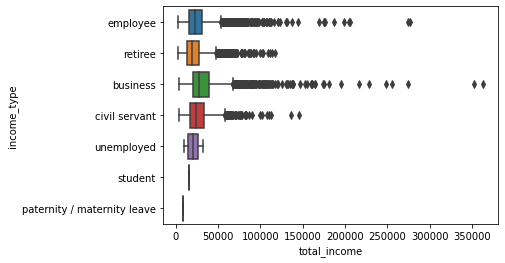

In [ ]:
sns.boxplot(data=df_wo_na, x='total_income', y='income_type')

`Boxplot` `total_income` berdasarkan `income_type`.

`education` cukup berpengaruh dan terbagi menjadi kedua kelompok. Kelompok nasabah yang cenderung memiliki pendapatn lbih tinggi memilki pendidikan `bachelor's degree`, `graduate degree`, dan `some college`. Sedangkan `secondary education` dan `primary education` cenderung lebih rendah.

Namun pada `income_type` lebih terlihat perbedaan dan rentangnya lebih besar dibandingkan pada `education`. Karena itu saya lebih memilih menggunakan `income_type`. Dan data yang digunakan adalah data `median` karena berdasarkan data boxplot dibawah memperlihatkan ada banyak data outliers.

In [ ]:
#  Tulis fungsi yang akan kita gunakan untuk mengisi nilai yang hilang
import math as math
        
def fill_na_total_income (row):
        if math.isnan(row['total_income']) == False:
            #print('test') #test
            return row['total_income']
        elif row['income_type'] == 'business':
            return income_type_median['business']
        elif row['income_type'] == 'civil servant':
            return income_type_median['civil servant']
        elif row['income_type'] == 'employee':
            return income_type_median['employee']
        elif row['income_type'] == 'paternity / maternity leave':
             return income_type_median['paternity / maternity leave']
        elif row['income_type'] == 'retiree':
            return income_type_median['retiree']
        elif row['income_type'] == 'student':
            return income_type_median['student']
        elif row['income_type'] == 'unemployed':    
            return income_type_median['unemployed']


Fungsi diatas adalah fungsi untuk menambahkan nilai `median` dari `total_income` berdasakan `income_type`.

In [ ]:
# Memeriksa bagaimana nilai di dalam kolom baru

business_row = df_drop.iloc[65].copy()
business_row['total_income'] = fill_na_total_income(business_row)
print('business_row:')
print(business_row)
print()

civil_servant_row = df_drop.iloc[26].copy()
civil_servant_row['total_income'] = fill_na_total_income(civil_servant_row)
print('civil_servant_row:')
print(civil_servant_row)
print()

employee_row = df_drop.iloc[82].copy()
employee_row['total_income'] = fill_na_total_income(employee_row)
print('employee_row:')
print(employee_row)
print()

#'paternity / maternity leave' tidak ada

retiree_row = df_drop.iloc[12].copy()
retiree_row['total_income'] = fill_na_total_income(retiree_row)
print('retiree_row:')
print(retiree_row)
print()

#'student' tidak ada
#'unemployed' tidak ada

wo_na_row = df_wo_na.iloc[0].copy()
print('wo_na_row before:')
print(wo_na_row)
print()
wo_na_row['total_income'] = fill_na_total_income(wo_na_row)
print('wo_na_row after:')
print(wo_na_row)

business_row:
children                                                   0
days_employed                                            NaN
dob_years                                                 21
education                                secondary education
education_id                                               1
family_status                                      unmarried
family_status_id                                           4
gender                                                     M
income_type                                         business
debt                                                       0
total_income                                       27564.893
purpose             transactions with commercial real estate
dob_group                                              16-25
Name: 65, dtype: object

civil_servant_row:
children                              0
days_employed                       NaN
dob_years                            41
education           secondary

Fungsi telah diuji dan berhasil. Saatnya menerapkan ke seluruh dataset. 

In [ ]:
# Terapkan fungsi tersebut ke setiap baris
df_w_t_income = df_drop.copy()
#df_w_t_income
df_w_t_income['total_income'] = df_w_t_income.apply(fill_na_total_income, axis=1)

In [ ]:
# Periksa apakah kita mendapatkan kesalahan
df_w_t_income.loc[df_w_t_income['total_income'].isna() == True ]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_group


Nilai `total_income` yang datanya hilang sudah terisi. Selanjutnya saya akan memeriksa jumlah barisnya. 

In [ ]:
# Periksa jumlah entri di kolom
df_w_t_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21352 entries, 0 to 21351
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21352 non-null  int64  
 1   days_employed     19259 non-null  float64
 2   dob_years         21352 non-null  int64  
 3   education         21352 non-null  object 
 4   education_id      21352 non-null  int64  
 5   family_status     21352 non-null  object 
 6   family_status_id  21352 non-null  int64  
 7   gender            21352 non-null  object 
 8   income_type       21352 non-null  object 
 9   debt              21352 non-null  int64  
 10  total_income      21352 non-null  float64
 11  purpose           21352 non-null  object 
 12  dob_group         21352 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.1+ MB


berdasarkan dai method `info()`, dapat dilihat bahwa kolom `total_income` telah berhasil terisi semua. Selanjutnya saya akan mengisi nilai kolom `days_employed` yang datanya hilang.  

###  Memperbaiki nilai di `days_employed`

In [ ]:
# Distribusi median dari `days_employed` berdasarkan parameter yang Anda identifikasi
dob_group_median = df_w_t_income.groupby('dob_group')['days_employed'].median()
dob_group_median

dob_group
16-25       796.5
26-35      1350.5
36-45      1916.5
46-55      2886.0
56-65    344187.0
66-75    360948.0
Name: days_employed, dtype: float64

Nilai `median` kolom `days_employed` berdasarkan `dob_grup`.

In [ ]:
# Distribusi rata-rata dari `days_employed` berdasarkan parameter yang Anda identifikasi
dob_group_mean = df_w_t_income.groupby('dob_group')['days_employed'].mean()
dob_group_mean

dob_group
16-25      1222.837230
26-35      2872.912981
36-45      7613.716030
46-55     62996.093432
56-65    231477.468281
66-75    321275.613354
Name: days_employed, dtype: float64

Nilai `mean` dari kolom `days_employed` berdasarkan kolom `dob_group`.

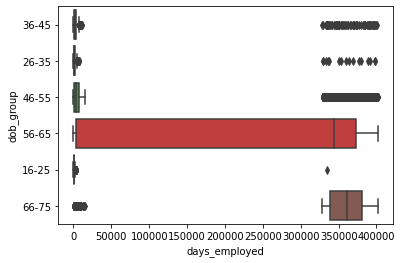

In [ ]:
sns.boxplot(data=df_w_t_income, x='days_employed', y='dob_group')

Banyak nilai `outlier` dari visualisasi `boxplot` nilai `days_employed` berdasarkan kolom `dob_group`. Karena banyak nilai `outlier`maka saya kan menggunakan data `median`.

In [ ]:
# Mari tulis fungsi yang menghitung rata-rata atau median (tergantung keputusan Anda) berdasarkan parameter yang Anda identifikasi

def fill_days_employed_na (row) :
    if math.isnan(row['days_employed']) == False:
        return row['days_employed']
    elif row['dob_group'] == '16-25':
        return dob_group_median['16-25']
    elif row['dob_group'] == '26-35':
        return dob_group_median['26-35']
    elif row['dob_group'] == '36-45':
        return dob_group_median['36-45']
    elif row['dob_group'] == '46-55':
        return dob_group_median['46-55']
    elif row['dob_group'] == '56-65':
        return dob_group_median['56-65']
    elif row['dob_group'] == '66-75':
        return dob_group_median['66-75']


Fungsi diatas bertujuan untuk mengisi nilai `days_employed` yang hilang menggunakan nilai `median` berdasarkan `dob_group`.

In [ ]:
# Periksa apakah fungsi Anda dapat bekerja
row_16_25 = df_w_t_income.loc[65].copy()
row_26_35 = df_w_t_income.loc[72].copy()
row_36_45 = df_w_t_income.loc[26].copy()
row_46_55 = df_w_t_income.loc[41].copy()
row_56_65 = df_w_t_income.loc[12].copy()
row_66_75 = df_w_t_income.loc[280].copy()
no_na = df_w_t_income.loc[25].copy()

row_16_25['days_employed'] = fill_days_employed_na(row_16_25)
row_26_35['days_employed'] = fill_days_employed_na(row_26_35)
row_36_45['days_employed'] = fill_days_employed_na(row_36_45)
row_46_55['days_employed'] = fill_days_employed_na(row_46_55)
row_56_65['days_employed'] = fill_days_employed_na(row_56_65)
row_66_75['days_employed'] = fill_days_employed_na(row_66_75)

lists = [row_16_25, row_26_35, row_36_45, row_46_55, row_56_65, row_66_75]

for row in lists:
    print(row['dob_group']+':')
    print(row)
    print()
    
print('no_na before:')
print(no_na)
print()
no_na['days_employed'] = fill_days_employed_na(no_na)
print('no_na after:')
print(no_na)

16-25:
children                                                   0
days_employed                                          796.5
dob_years                                                 21
education                                secondary education
education_id                                               1
family_status                                      unmarried
family_status_id                                           4
gender                                                     M
income_type                                         business
debt                                                       0
total_income                                       27564.893
purpose             transactions with commercial real estate
dob_group                                              16-25
Name: 65, dtype: object

26-35:
children                                                   1
days_employed                                         1350.5
dob_years                                     

Fungsinya telah diuji dan berhasil, sekarang saatnya menerapkannya pada dataset.

In [ ]:
# Ganti nilai yang hilang
df_d_employed_filled = df_w_t_income.copy()
df_d_employed_filled['days_employed'] = df_d_employed_filled.apply(fill_days_employed_na, axis=1)
df_d_employed_filled

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_group
0,1,8437.0,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,36-45
1,1,4024.0,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,36-45
2,0,5623.0,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,26-35
3,3,4124.0,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,26-35
4,0,340266.0,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,46-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21347,1,4529.0,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,36-45
21348,0,343937.0,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,66-75
21349,1,2113.0,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,36-45
21350,3,3112.0,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,36-45


In [ ]:
# Periksa entri di semua kolom - pastikan kita memperbaiki semua nilai yang hilang
df_d_employed_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21352 entries, 0 to 21351
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21352 non-null  int64  
 1   days_employed     21352 non-null  float64
 2   dob_years         21352 non-null  int64  
 3   education         21352 non-null  object 
 4   education_id      21352 non-null  int64  
 5   family_status     21352 non-null  object 
 6   family_status_id  21352 non-null  int64  
 7   gender            21352 non-null  object 
 8   income_type       21352 non-null  object 
 9   debt              21352 non-null  int64  
 10  total_income      21352 non-null  float64
 11  purpose           21352 non-null  object 
 12  dob_group         21352 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.1+ MB


Setelah diperiksa, nilai `days_employed`nya telah terisi.

#Mencari nilai `days_employed` yang tidak masuk akal

Usia nasabah tertua adalah 75 tahun. Artinya tidak masuk akal jika ada masa kerja nasabah yang diatas 57 tahun. Karena pada umumnya paling cepat seseorang bekerja setelah menyelesaikan sekolah menengah atas / kejuruan yang waktunya selama 18 tahun. Artinya jika ada orang yang masa bekerjanya diatas 57 menurut saya datanya tidak masuk akal.

In [ ]:
df_d_employed_filled['dob_years'].sort_values().unique()

array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75])

In [ ]:
df_d_employed_filled.loc[df_d_employed_filled['days_employed'] >= 57*365 ]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_group
4,0,340266.0,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,46-55
12,0,344187.0,65,secondary education,1,civil partnership,1,M,retiree,0,18969.149,to have a wedding,56-65
18,0,400281.0,53,secondary education,1,widow / widower,2,F,retiree,0,9091.804,buying a second-hand car,46-55
24,1,338551.0,57,secondary education,1,unmarried,4,F,retiree,0,46487.558,transactions with commercial real estate,56-65
25,0,363548.0,67,secondary education,1,married,0,M,retiree,0,8818.041,buy real estate,66-75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21332,0,338904.0,53,secondary education,1,civil partnership,1,M,retiree,0,12070.399,to have a wedding,46-55
21335,0,386497.0,62,secondary education,1,married,0,M,retiree,0,11622.175,property,56-65
21336,0,362161.0,59,bachelor's degree,0,married,0,M,retiree,0,11684.650,real estate transactions,56-65
21345,0,373995.0,59,secondary education,1,married,0,F,retiree,0,24618.344,purchase of a car,56-65


Ternyata datanya sebanyak 3,857. Secara persentase 10% lebih dari seluruh dataset. Karena itu sebaiknya kita ganti nilai datanya berdasarkan tingkat pendidikan. Karena tingkat pendidikan cukup menentukan berapa lama seseorang telah bekerja. Tapi sebelumnya kita cari tahu dulu apakah nilai `days_emmployed` ini memiliki outliers agar kita dapat menentukan nilai apa yang dijadikan nilai pengganti.

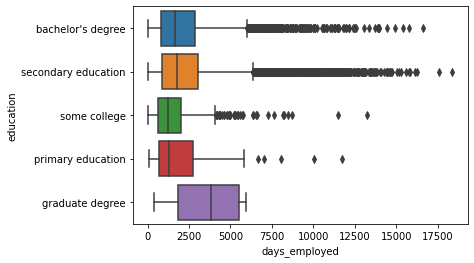

In [ ]:
filtered_df_d_employed_filled = df_d_employed_filled.loc[df_d_employed_filled['days_employed'] < 57*365 ].copy()
sns.boxplot(data = filtered_df_d_employed_filled, x ='days_employed', y='education')

Ternyata masih banyak data outliers, meskipun nilai yang tidak masuk akal sudah dibuang. Karena itu kita akan menggunakan nilai median dari masing-masing tingkat pendidikan.

In [ ]:
de_median_by_edu = filtered_df_d_employed_filled.groupby('education')['days_employed'].median()
de_median_by_edu

education
bachelor's degree      1641.0
graduate degree        3851.5
primary education      1294.0
secondary education    1754.0
some college           1216.0
Name: days_employed, dtype: float64

Mari kita buat fungsinya

In [ ]:
def de_correction (row) :
  if row['days_employed'] >= 365*57:
    if row['education'] == "bachelor's degree":
      return de_median_by_edu["bachelor's degree"]
    elif row['education'] == 'graduate degree':
      return de_median_by_edu['graduate degree']
    elif row['education'] == 'primary education':
      return de_median_by_edu['primary education'] 
    elif row['education'] == 'secondary education':
      return de_median_by_edu['secondary education']
    elif row['education'] == 'some college':
      return de_median_by_edu['some college']
  else:
    return row['days_employed']

#test function
#wrong DE
print(de_correction(df_d_employed_filled.loc[4]))
#right DE
print(filtered_df_d_employed_filled.loc[0])
print(de_correction(filtered_df_d_employed_filled.loc[0]))

1754.0
children                                1
days_employed                      8437.0
dob_years                              42
education               bachelor's degree
education_id                            0
family_status                     married
family_status_id                        0
gender                                  F
income_type                      employee
debt                                    0
total_income                    40620.102
purpose             purchase of the house
dob_group                           36-45
Name: 0, dtype: object
8437.0


Fungsinya telah diuji dan berhasil. Mari kita terapkan ke dataset

In [ ]:
df_d_employed_filled['days_employed'] = df_d_employed_filled.apply(de_correction, axis=1)
df_d_employed_filled.loc[df_d_employed_filled['days_employed'] >= 57*365]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_group


Fungsi telah berhasil diterapkan kedalam dataset, karena sudah tidak ada nasabah yang nilai `days_employed`nya ditas 57 tahun.

## Pengkategorian Data


In [ ]:
# Periksa nilai unik

def find_word_in_array (looked_array, list_to_fill, word_to_find):
    for match in looked_array:
        if word_to_find in match:
            list_to_fill.append(match)
porpose_property = []
porpose_education = []
purpose_car = []
purpose_wedding = []
df_purpose_unique = df_d_employed_filled['purpose'].sort_values().unique()

find_word_in_array(df_purpose_unique, porpose_property, 'property')
find_word_in_array(df_purpose_unique, porpose_property, 'house')
find_word_in_array(df_purpose_unique, porpose_property, 'real estate')
find_word_in_array(df_purpose_unique, porpose_property, 'housing')

find_word_in_array(df_purpose_unique, porpose_education, 'education')
find_word_in_array(df_purpose_unique, porpose_education, 'university')
find_word_in_array(df_purpose_unique, porpose_education, 'educated')

find_word_in_array(df_purpose_unique, purpose_car, 'car')

find_word_in_array(df_purpose_unique, purpose_wedding, 'wedding')

print('nilai unique dari purpose:')
df_purpose_unique


nilai unique dari purpose:


array(['building a property', 'building a real estate',
       'buy commercial real estate', 'buy real estate',
       'buy residential real estate', 'buying a second-hand car',
       'buying my own car', 'buying property for renting out', 'car',
       'car purchase', 'cars', 'construction of own property',
       'education', 'getting an education', 'getting higher education',
       'going to university', 'having a wedding', 'housing',
       'housing renovation', 'housing transactions', 'profile education',
       'property', 'purchase of a car', 'purchase of my own house',
       'purchase of the house', 'purchase of the house for my family',
       'real estate transactions', 'second-hand car purchase',
       'supplementary education', 'to become educated', 'to buy a car',
       'to get a supplementary education', 'to have a wedding',
       'to own a car', 'transactions with commercial real estate',
       'transactions with my real estate', 'university education',
       'we

Dari sekian banyak nilai unik, yang saya lihat hanya ada 4 tujuan utama:
- Pembelian property
- Membeli kendaraa
- membiayai pendidikan
- membiayai pernikahan

Karena itu dari sekian banyak nilai unik dari kolom `purpose` harus dimasukan kedalam 4 kategori tersebut.  


In [ ]:
# Mari kita tulis sebuah fungsi untuk mengategorikan data berdasarkan topik umum

def find_word_in_df (row) :
    for match in porpose_property:
        if row['purpose'] in match:
            return 'to buy property'
        else: 
            pass
    for match in porpose_education:
        if row['purpose'] in match:
            return 'to get education'
        else: 
            pass
    for match in purpose_car:
        if row['purpose'] in match:
            return 'to buy a car'
        else: 
            pass
    for match in purpose_wedding:
        if row['purpose'] in match:
            return 'to get married'
        else: 
            pass
        
#df_d_employed_filled

print(find_word_in_df(df_d_employed_filled.iloc[0])) #test to buy property
print(find_word_in_df(df_d_employed_filled.iloc[1])) #test to buy a car
print(find_word_in_df(df_d_employed_filled.iloc[3])) #test to get education
print(find_word_in_df(df_d_employed_filled.iloc[4])) #test to get married

to buy property
to buy a car
to get education
to get married


Fungsi diatas bertujuan untuk mengelompokan data-data dalam kolom `purporse` dan fungsinya telah diuji dan berhasil. Sekarang saatnya menerapkan kedalam dataset.

In [ ]:
# Buat kolom yang memuat kategori dan hitung nilainya 
df_new_group = df_d_employed_filled.copy()
df_new_group['purpose_group'] = df_new_group.apply(find_word_in_df, axis = 1)

df_new_group['purpose_group'].value_counts()

to buy property     10763
to buy a car         4284
to get education     3995
to get married       2310
Name: purpose_group, dtype: int64

Kolomnya sudah berhasil ditambahkan dan datanya sudah dapat dilihat. Alasan terbanyak yang dari nasabah untuk meminjam dana adalah `untuk membeli properti`, setelah itu disusul oleh `untuk membeli mobil`, `untuk biaya pendidikan`, dan `untuk biaya pernikahan`.

In [ ]:
# Melihat nilai median dari kolom total_income
total_income_median = df_new_group['total_income'].median()
total_income_median

22815.103499999997

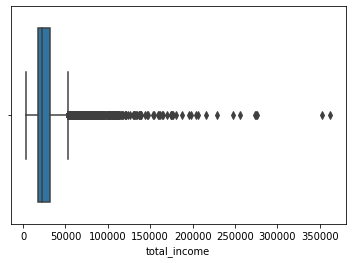

In [ ]:
sns.boxplot(data=df_new_group, x='total_income')

In [ ]:
df_new_group.loc[df_new_group['total_income'] > 50000, 'total_income'].shape

(1318,)

Untuk kolom `purpose` saya mendapatkan temuan tujuan pinjaman dari nasabah adalah untuk membiayai properti.

Untuk kolom `total income ` saya mendapatkan 3 temuan:
- Nilai median dari total_income adalah sebesar 22,815.10.
- Berdasarkan visualisasi dari boxplot menunjukan nilai outliers setelah datas 50,000.
- Jumlah nasabah yang memiliki total_income diatas 50,000 sebanyak 1,318 nasabah.

Untuk yang kolom numerik, yaitu `total_income`. Berdasarkan temuan sebelumnya saya akan membagi menjadi 3 rentang / kelompok:
- Rendah, dibawah median 22,815.
- Sedang, diatas median dan dibawah batas outlier dari boxplot, 50rb
- diatas 50rb

Karena jumlah nasabah yang diatas batas outliers cukup banyak maka saya menjadikan yang diatas batas outliers sebagai rentang atas, dan membagi nasabah diluar outliers menjadi sedang dan rendah dengan nilai median.

In [ ]:
# Buat fungsi yang melakukan pengkategorian menjadi kelompok numerik yang berbeda berdasarkan rentang

def grouping_total_income(row) :
    if row['total_income'] <= total_income_median:
        return 'low'
    elif row['total_income'] > total_income_median and row['total_income'] <= 50000:
        return 'medium'
    elif row['total_income'] > 50000:
        return 'high'

print(grouping_total_income(df_new_group.iloc[1])) #test low
print(grouping_total_income(df_new_group.iloc[0])) #test medium  
print(grouping_total_income(df_new_group.iloc[39])) #test high
    
#df_new_group.loc[df_new_group['total_income'] > 50000]

low
medium
high


Sebelum memulai saya membuat terlebih dahulu fungsi untuk mengkategorikan nasabah berdasarkan `total_income`nya. Selain itu fungsinya telah berhasi diuji dan untuk selanjutnya saya akan menerapkan fungsinya didalam dataset.

In [ ]:
# Buat kolom yang memuat kategori dengan menerapkan fungsi keseluruh dataset
df_new_group['total_income_group'] = df_new_group.apply(grouping_total_income, axis=1)

In [ ]:
# Hitung setiap nilai kategori untuk melihat pendistribusiannya
df_new_group['total_income_group'].value_counts()

low       10790
medium     9244
high       1318
Name: total_income_group, dtype: int64

## Memeriksa hipotesis


### Korelasi antara memiliki anak dengan melakukan pelunasan tepat waktu

In [ ]:
# Periksa data anak dan data pelunasan tepat waktu
df_new_group.loc[:,['children', 'debt']]

,children,debt
0,1,0
1,1,0
2,0,0
3,3,0
4,0,0
...,...,...
21347,1,0
21348,0,0
21349,1,1
21350,3,1


In [ ]:
# Hitung gagal bayar berdasarkan jumlah anak
table_children_debt_1 = pd.pivot_table(df_new_group, values='total_income', index = ['children'], columns = ['debt'], aggfunc = 'count')
table_children_debt_1

debt,0,1
children,,
0,12963.0,1058.0
1,4397.0,442.0
2,1912.0,202.0
3,301.0,27.0
4,37.0,4.0
5,9.0,NaN


In [ ]:
table_children_debt_2 = pd.crosstab(df_new_group['children'], df_new_group['debt'], values = 'total_income', aggfunc = 'count', normalize = 'index')
table_children_debt_2

debt,0,1
children,,
0,0.924542,0.075458
1,0.908659,0.091341
2,0.904447,0.095553
3,0.917683,0.082317
4,0.902439,0.097561
5,1.000000,0.000000


Tidak ada hubungannya antara jumlah anak dengan kegagalan bayar. Karena jika dilihat dari jumlah, semakin sedikit anak justru semakin banyak jumlah yang mengalami gagal bayar. Meskipun jika dilihat dari distribusi per jumlah `children`, persentase gagal bayar pada nasabah yang tidak memiliki anak lebih rendah dibandingkan yang memiliki anak.

### Korelasi antara status keluarga dengan pelunasan tepat waktu

In [ ]:
# Periksa data status keluarga dan pelunasan tepat waktu
df_new_group.loc[:,['family_status', 'debt']]

,family_status,debt
0,married,0
1,married,0
2,married,0
3,married,0
4,civil partnership,0
...,...,...
21347,civil partnership,0
21348,married,0
21349,civil partnership,1
21350,married,1


In [ ]:
# Hitung gagal bayar berdasarkan status keluarga
table_fam_status_debt_1 = pd.pivot_table(df_new_group, values='total_income', index = ['family_status'], columns = ['debt'], aggfunc = 'count')
table_fam_status_debt_1

debt,0,1
family_status,,
civil partnership,3743,386
divorced,1100,85
married,11363,927
unmarried,2521,273
widow / widower,892,62


In [ ]:
table_fam_status_debt_2 = pd.crosstab(df_new_group['family_status'], df_new_group['debt'], values = 'total_income', aggfunc = 'count', normalize = 'index')
table_fam_status_debt_2

debt,0,1
family_status,,
civil partnership,0.906515,0.093485
divorced,0.928270,0.071730
married,0.924573,0.075427
unmarried,0.902291,0.097709
widow / widower,0.935010,0.064990


Berdasarkan ketiga tabel diatas, saya melihat persentase kegagalan bayar cenderung lebih tinggi pada `civil partnership` dan `unmarried`.

### Korelasi antara tingkat pendapatan dengan membayar kembali tepat waktu

In [ ]:
# Periksa data tingkat pendapatan dan pelunasan tepat waktu
df_new_group.loc[:,['total_income_group', 'debt']]

,total_income_group,debt
0,medium,0
1,low,0
2,medium,0
3,medium,0
4,medium,0
...,...,...
21347,medium,0
21348,medium,0
21349,low,1
21350,medium,1


In [ ]:
# Hitung gagal bayar berdasarkan tingkat pendapatan
table_tot_inc_grp_debt_1 = pd.pivot_table(df_new_group, values='total_income', index = ['total_income_group'], columns = ['debt'], aggfunc = 'count')
table_tot_inc_grp_debt_1

debt,0,1
total_income_group,,
high,1226,92
low,9884,906
medium,8509,735


In [ ]:
table_tot_inc_grp_debt_2 = pd.crosstab(df_new_group['total_income_group'], df_new_group['debt'], values = 'total_income', aggfunc = 'count', normalize = 'index')
table_tot_inc_grp_debt_2

debt,0,1
total_income_group,,
high,0.930197,0.069803
low,0.916033,0.083967
medium,0.920489,0.079511


Saya tadinya menduga pendapatan berpengaruh terhadap gagal bayar. Namun ketbika membandingkan distribusi frekuensi antara nasabah yang gagal bayar dan berhasil bayar. Kurang lebih komposisinya serupa.

Namun setelah dilihat secara persentase. Meskipun secara jumlah rendah, namun tingkat kegagal bayar pada nasabah dengan tingkat pendapatan tinggi relatif lebih rendah dan sebaliknya.

### Korelasi antara tujuan kredit memengaruhi tingkat gagal bayar

In [ ]:
# Periksa persentase tingkat gagal bayar untuk setiap tujuan kredit dan lakukan penganalisisan

table_purpose_grp_debt_col = pd.crosstab(df_new_group['purpose_group'], df_new_group['debt'], values = 'total_income', aggfunc = 'count', normalize = 'columns')
table_purpose_grp_debt_col

debt,0,1
purpose_group,,
to buy a car,0.197971,0.230814
to buy property,0.508894,0.449510
to get education,0.184770,0.213503
to get married,0.108364,0.106174


**Tabel persentase per kolom**

In [ ]:
table_purpose_grp_debt_idx = pd.crosstab(df_new_group['purpose_group'], df_new_group['debt'], values = 'total_income', aggfunc = 'count', normalize = 'index')
table_purpose_grp_debt_idx

debt,0,1
purpose_group,,
to buy a car,0.906629,0.093371
to buy property,0.927622,0.072378
to get education,0.907384,0.092616
to get married,0.920346,0.079654


**Tabel persentase per index**

Persentase dengan tujuan kredit untuk pembelian mobil dan edukasi lebih tinggi pada kelompok yang pernah gagal bayar dibandingkan dengan pada kelompok yg tidak pernah gagal bayar, jika kita membandingkan setiap tujuan kredit. Namun jika melihat dari seluruh nasabah yang mengalami kegagalan bayar, nasabah yang dengan tujuan pembiayaan properti paling tinggi dibandingkan tujuan lainnya. Untuk membiayai properi merupakan tujuan terbanyak dari seluruh nasabah baik yang pernah ataupun tidak pernah mengalami gagal bayar. 


# Kesimpulan umum 

Kesimpulan saya dalam tugas akhir di sprint ini adalah kita tidak bisa terburu-buru mengambil kesimpulan dan perlunya membandingkan data untuk. 

Hal tersebut saya alami ketika melakukan analisa pada data 'total_income' dan 'days_employed' yang hilang. Pada saat itu karena pada distribusi data yang hilang didominasi oleh nasabah dengan tingkat pendidikan secondary education. Namun saat melihat pada distribusi yang datanya lengkap polanya pun sama. Artinya pola tersebut memang terjadi pada seluruh dataset. 

Begitu jg ketika mencari faktor yang mempengaruhi gagal bayar. Saya menduga tingkat pendapatan yang rendah berpengaruh terhadap gagal bayar. Namun ketika dibandingkan dengan data kelompok yang tidak pernah gagal bayar. Komposisinya tingkat pendapatan rendah, sedang, dan tinggi kurang lebih memiliki persentase yang serupa. 

Kemudian saya mencoba melihat persentase per index. Ada beberapa temuan baru:
- Nasabah yang tidak memiliki anak cenderung lebih sedikit mengalami kegagalan bayar.
- Nasabah dengan `family_status` `unmarried` dan `civil partnership` memiliki persentase lebih tinggi gagal bayar.
- Nasabah dengan `purpose` pembiayaan mobil dan pendidikan juga memiliki persebtase lebih tinggi gagal bayar.
